In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=['date'],index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [11]:
df = df[(df["value"]>= df["value"].quantile(0.025)) & 
(df["value"]<= df["value"].quantile(0.975))]

In [12]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


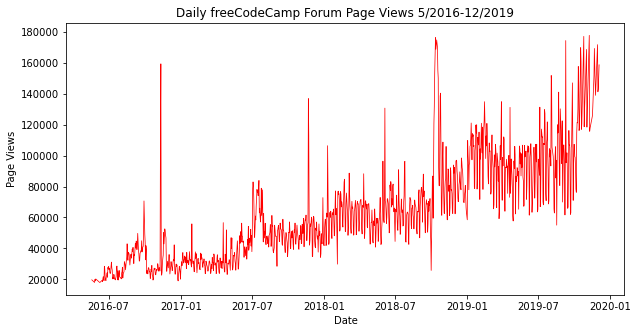

In [13]:

#fig is the overall figure layout and axes are the axes object: ax.plot(x,y)
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['value'],'r',linewidth=.75)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

plt.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_7228\2841587907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.index.month
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7228\2841587907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df.index.year


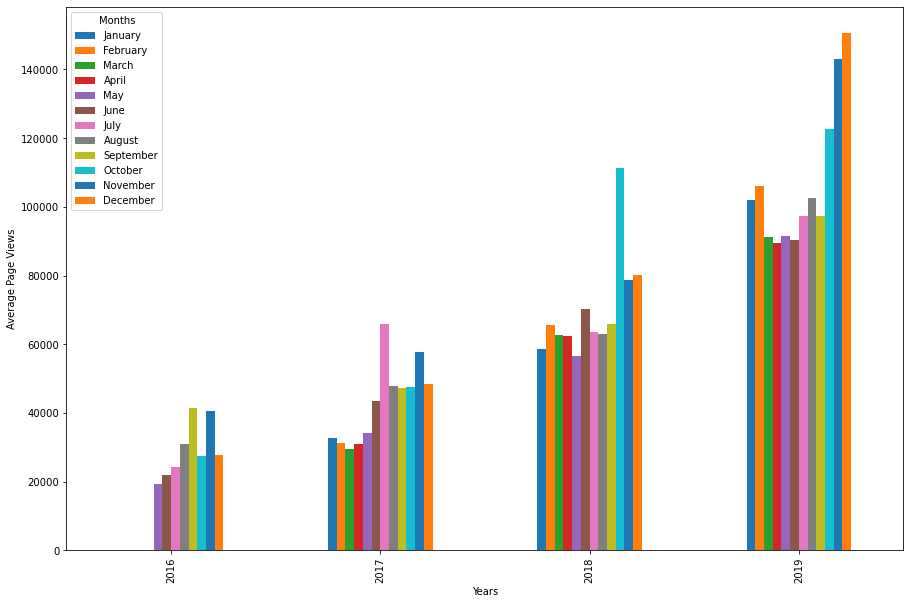

In [19]:
#draw_bar_plot:
#acquiring month and year column from the index and adding in the dataframe

# Copy and modify data for monthly bar plot
df_bar = df.copy(deep=True)
df["month"] = df.index.month
df["year"] = df.index.year

#saving the grouped dataframe as df_bar
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

# Draw bar plot
#for plotting in pandas use df.plot.bar
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()



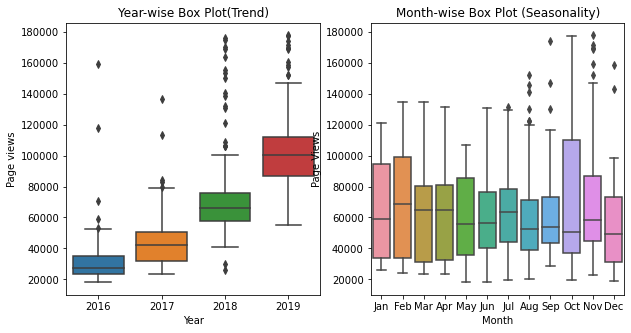

In [24]:
#draw_box_plot():
# strftime : returns the string representation of the date or time object.

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]


    
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')
    
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0]=sns.boxplot(x=df_box['year'],y=df_box['value'],ax=axes[0])
axes[1]=sns.boxplot(x=df_box['month'],y=df_box['value'],ax=axes[1])
    
axes[0].set_title("Year-wise Box Plot(Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page views")
    
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

plt.show()

